# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [4]:
from sklearn.datasets import make_moons
moons,moons_class=make_moons(500,noise=0.3)
### Data generation


❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

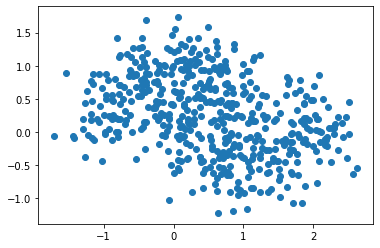

In [5]:
from matplotlib import pyplot as plt
import numpy as np
plt.scatter(*zip(*moons)) 
plt.show()



❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [3]:
from sklearn.model_selection import train_test_split
moons,moons_class=make_moons(250,noise=0.2)
X_train,X_test,y_train,y_test=train_test_split(moons,moons_class,test_size=0.3)


## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [6]:
from keras.models import Sequential
from keras.layers import Dense


In [7]:
def initialize_model():
    model = Sequential()
    model.add(Dense(5,input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [101]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [18]:
model.fit(X_train,y_train,moons_class,epochs=150)


Epoch 1/150
16/16 [==============================] - 2s 1ms/step - loss: 0.7160 - accuracy: 0.3660
Epoch 2/150
16/16 [==============================] - 0s 1ms/step - loss: 0.7016 - accuracy: 0.4800
Epoch 3/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.6000
Epoch 4/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6762 - accuracy: 0.6420
Epoch 5/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.6640
Epoch 6/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.6700
Epoch 7/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.6900
Epoch 8/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.7000
Epoch 9/150
16/16 [==============================] - 0s 997us/step - loss: 0.6270 - accuracy: 0.7020
Epoch 10/150
16/16 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.7100
Epoch 1

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [19]:
print(model.history.__dict__)

{'validation_data': None, 'model': <keras.engine.sequential.Sequential object at 0x00000218585C0188>, '_chief_worker_only': None, '_supports_tf_logs': False, 'history': {'loss': [0.7159742116928101, 0.7015640735626221, 0.6883195638656616, 0.6761676073074341, 0.6647831201553345, 0.6544228792190552, 0.6447180509567261, 0.6355523467063904, 0.6270162463188171, 0.6189567446708679, 0.6107409000396729, 0.6028171181678772, 0.5950276255607605, 0.5870954990386963, 0.5792139768600464, 0.5715296864509583, 0.5637444853782654, 0.5562121868133545, 0.54859459400177, 0.5408916473388672, 0.5335683226585388, 0.5262134671211243, 0.5187540054321289, 0.5115228295326233, 0.5044624209403992, 0.49732330441474915, 0.4904923439025879, 0.48446038365364075, 0.4782283902168274, 0.4724847376346588, 0.4672604203224182, 0.4620791971683502, 0.45749834179878235, 0.45293328166007996, 0.44865939021110535, 0.44487282633781433, 0.44089800119400024, 0.4375944137573242, 0.43405669927597046, 0.43109452724456787, 0.428174287080

❓ Plot the history of the train loss using the following function

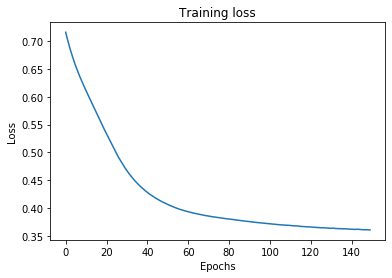

[0.7159742116928101, 0.7015640735626221, 0.6883195638656616, 0.6761676073074341, 0.6647831201553345, 0.6544228792190552, 0.6447180509567261, 0.6355523467063904, 0.6270162463188171, 0.6189567446708679, 0.6107409000396729, 0.6028171181678772, 0.5950276255607605, 0.5870954990386963, 0.5792139768600464, 0.5715296864509583, 0.5637444853782654, 0.5562121868133545, 0.54859459400177, 0.5408916473388672, 0.5335683226585388, 0.5262134671211243, 0.5187540054321289, 0.5115228295326233, 0.5044624209403992, 0.49732330441474915, 0.4904923439025879, 0.48446038365364075, 0.4782283902168274, 0.4724847376346588, 0.4672604203224182, 0.4620791971683502, 0.45749834179878235, 0.45293328166007996, 0.44865939021110535, 0.44487282633781433, 0.44089800119400024, 0.4375944137573242, 0.43405669927597046, 0.43109452724456787, 0.42817428708076477, 0.4253973662853241, 0.4228847324848175, 0.42037859559059143, 0.4180751442909241, 0.41592660546302795, 0.41378718614578247, 0.4117927849292755, 0.40998879075050354, 0.40818

In [20]:
plt.plot(model.history.epoch, model.history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print(model.history.history["loss"])
print(model.history.epoch)




In [21]:
model.evaluate(X_test,y_test,moons_class)

16/16 [==============================] - 0s 798us/step - loss: 0.3606 - accuracy: 0.8360


[0.3606331944465637, 0.8360000252723694]

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [22]:
print(model.predict(X_test))

[[0.90907276]
 [0.05229077]
 [0.61659694]
 [0.06707227]
 [0.60672724]
 [0.8927847 ]
 [0.48294184]
 [0.2376115 ]
 [0.2699339 ]
 [0.9928738 ]
 [0.03850773]
 [0.99506205]
 [0.94373995]
 [0.91935444]
 [0.5206844 ]
 [0.76776963]
 [0.65690136]
 [0.03238487]
 [0.32072505]
 [0.10684854]
 [0.2148844 ]
 [0.82159257]
 [0.74191463]
 [0.8644257 ]
 [0.04133269]
 [0.9453361 ]
 [0.0340282 ]
 [0.09925443]
 [0.13686448]
 [0.9828392 ]
 [0.04928738]
 [0.0727188 ]
 [0.49742648]
 [0.12156805]
 [0.9600463 ]
 [0.26963985]
 [0.0454742 ]
 [0.37717375]
 [0.07493359]
 [0.9880859 ]
 [0.8371481 ]
 [0.8210801 ]
 [0.5462428 ]
 [0.14109212]
 [0.8094192 ]
 [0.03438869]
 [0.04033643]
 [0.20406917]
 [0.25894764]
 [0.0440011 ]
 [0.36396438]
 [0.27341545]
 [0.01786175]
 [0.21300462]
 [0.18704864]
 [0.70041966]
 [0.16015801]
 [0.16579476]
 [0.07418939]
 [0.91949606]
 [0.70706326]
 [0.04893592]
 [0.8672269 ]
 [0.85202396]
 [0.04319471]
 [0.59682184]
 [0.98444504]
 [0.5611559 ]
 [0.824663  ]
 [0.0891023 ]
 [0.8376433 ]
 [0.25

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [23]:
print(model.evaluate(X_test, Y_test))



16/16 [==============================] - 0s 931us/step - loss: 0.3606 - accuracy: 0.8360
[0.3606331944465637, 0.8360000252723694]


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [25]:
_,accuracy = model.evaluate(moons, moons_class)

16/16 [==============================] - 0s 864us/step - loss: 0.3606 - accuracy: 0.8360


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

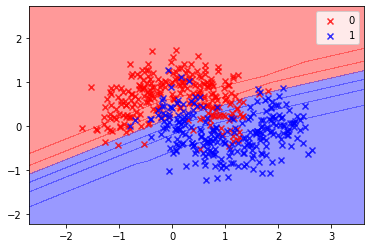

In [26]:
from plots import plot_decision_regions

plot_decision_regions(X_test,y_test, model)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.6160
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6260
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5888 - accuracy: 0.6340
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.6640
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7600
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7660
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5529 - accuracy: 0.7700
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7760
Epoch 9/500
16/16 [==============================] - 0s 798us/step - loss: 0.5367 - accuracy: 0.7780
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5279 - accuracy: 0.7820
Epoch 1

16/16 [==============================] - 0s 931us/step - loss: 0.3271 - accuracy: 0.8520
Epoch 163/500
16/16 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8520
Epoch 164/500
16/16 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8520
Epoch 165/500
16/16 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8520
Epoch 166/500
16/16 [==============================] - 0s 931us/step - loss: 0.3259 - accuracy: 0.8520
Epoch 167/500
16/16 [==============================] - 0s 931us/step - loss: 0.3255 - accuracy: 0.8520
Epoch 168/500
16/16 [==============================] - 0s 864us/step - loss: 0.3253 - accuracy: 0.8520
Epoch 169/500
16/16 [==============================] - 0s 864us/step - loss: 0.3250 - accuracy: 0.8540
Epoch 170/500
16/16 [==============================] - 0s 864us/step - loss: 0.3247 - accuracy: 0.8540
Epoch 171/500
16/16 [==============================] - ETA: 0s - loss: 0.1383 - accuracy: 1.0

16/16 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8860
Epoch 322/500
16/16 [==============================] - 0s 931us/step - loss: 0.2776 - accuracy: 0.8860
Epoch 323/500
16/16 [==============================] - 0s 997us/step - loss: 0.2771 - accuracy: 0.8860
Epoch 324/500
16/16 [==============================] - 0s 997us/step - loss: 0.2769 - accuracy: 0.8860
Epoch 325/500
16/16 [==============================] - 0s 866us/step - loss: 0.2766 - accuracy: 0.8860
Epoch 326/500
16/16 [==============================] - 0s 931us/step - loss: 0.2763 - accuracy: 0.8860
Epoch 327/500
16/16 [==============================] - 0s 998us/step - loss: 0.2760 - accuracy: 0.8860
Epoch 328/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8860
Epoch 329/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8860
Epoch 330/500
16/16 [==============================] - 0s 997us/step - loss: 0.2752 - accurac

Epoch 480/500
16/16 [==============================] - 0s 931us/step - loss: 0.2493 - accuracy: 0.8920
Epoch 481/500
16/16 [==============================] - 0s 931us/step - loss: 0.2490 - accuracy: 0.8920
Epoch 482/500
16/16 [==============================] - 0s 798us/step - loss: 0.2488 - accuracy: 0.8920
Epoch 483/500
16/16 [==============================] - 0s 733us/step - loss: 0.2488 - accuracy: 0.8920
Epoch 484/500
16/16 [==============================] - 0s 731us/step - loss: 0.2487 - accuracy: 0.8920
Epoch 485/500
16/16 [==============================] - 0s 732us/step - loss: 0.2485 - accuracy: 0.8920
Epoch 486/500
16/16 [==============================] - 0s 730us/step - loss: 0.2484 - accuracy: 0.8920
Epoch 487/500
16/16 [==============================] - 0s 799us/step - loss: 0.2483 - accuracy: 0.8920
Epoch 488/500
16/16 [==============================] - 0s 864us/step - loss: 0.2482 - accuracy: 0.8920
Epoch 489/500
16/16 [==============================] - 0s 933us/step - lo

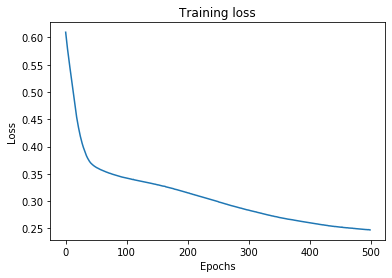

In [27]:
model= initialize_model()
model.fit(moons,moons_class,epochs=500)

plt.plot(model.history.epoch, model.history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




❓ Did the test accuracy improve?

In [ ]:
#Oui

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [28]:
def initialize_model():
    model = Sequential()
    model.add(Dense(20,input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


❓ What is the number of parameters of your new model?

In [ ]:
#2

Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5000
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5660
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.6580
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.7560
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7660
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5687 - accuracy: 0.7940
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.5530 - accuracy: 0.8100
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.8160
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.8200
Epoch 11/

Epoch 83/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 0.8940
Epoch 84/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.9000
Epoch 85/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8920
Epoch 86/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.8920
Epoch 87/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9020
Epoch 88/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.8960
Epoch 89/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.9000
Epoch 90/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.8980
Epoch 91/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.9000
Epoch 92/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.8960


Epoch 244/500
16/16 [==============================] - 0s 997us/step - loss: 0.2249 - accuracy: 0.8940
Epoch 245/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2258 - accuracy: 0.8960
Epoch 246/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9000
Epoch 247/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2265 - accuracy: 0.8960
Epoch 248/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2257 - accuracy: 0.8960
Epoch 249/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.8960
Epoch 250/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2265 - accuracy: 0.8940
Epoch 251/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9000
Epoch 252/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.8880
Epoch 253/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2260 - accur

16/16 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.8960
Epoch 405/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.9020
Epoch 406/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.8960
Epoch 407/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.8960
Epoch 408/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.8980
Epoch 409/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.8980
Epoch 410/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.8960
Epoch 411/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2216 - accuracy: 0.8980
Epoch 412/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.8980
Epoch 413/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.8960
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 0.2200 - accuracy: 0.9020
Epoch 486/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9040
Epoch 487/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.9020
Epoch 488/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9020
Epoch 489/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9000
Epoch 490/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9040
Epoch 491/500
16/16 [==============================] - 0s 931us/step - loss: 0.2190 - accuracy: 0.9020
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9020
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9000
Epoch 494/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9040
Ep

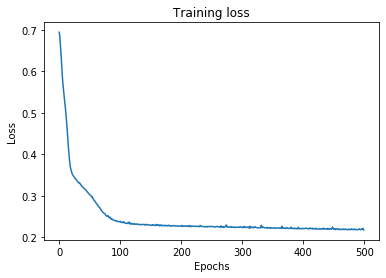

In [29]:
model= initialize_model()
model.fit(X_train,y_test,epochs=500)

plt.plot(model.history.epoch, model.history.history["loss"], label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [97]:
_,accuracy_deep = model.evaluate(X_test, y_test)
print(accuracy_deep)

3/3 [==============================] - 0s 2ms/step - loss: 0.8918 - accuracy: 0.4933
0.4933333396911621


❓ Do you think we have overfitted on the noise? Check it out below

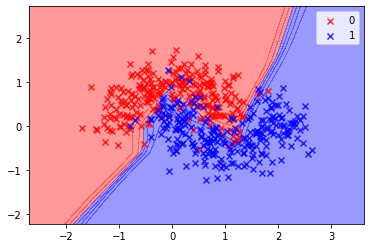

In [30]:

plot_decision_regions(X_test,y_test, model)

In [32]:
print(model.evaluate(moons, moons_class))



16/16 [==============================] - 0s 931us/step - loss: 0.2168 - accuracy: 0.9040
[0.21678009629249573, 0.9039999842643738]


In [ ]:
#Un peu d'overfitting